In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import seaborn as sns

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
import datetime

In [13]:
df_history = pd.read_pickle("df_history.pk") 

In [14]:
df_history = pd.read_pickle("df_history.pk")  
df_history['timestamp'] = df_history['ts'].copy()
df_history['timestamp'] = pd.to_datetime(df_history['timestamp'], unit="ms")
df_history.sort_values(by=["ts"], inplace=True)
df_history.set_index('timestamp', inplace=True)

In [15]:
df_history

,entity_type,entity_id,key,ts,bool_v,str_v,long_v,dbl_v,id_device,id_customer,name_device,name_customer
timestamp,,,,,,,,,,,,
2023-08-01 00:00:50.559,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848050559,None,None,56136804,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
2023-08-01 00:01:50.907,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848110907,None,None,56191321,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
2023-08-01 00:02:50.689,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848170689,None,None,56251341,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
2023-08-01 00:03:50.679,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848230679,None,None,56313564,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
2023-08-01 00:04:50.555,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848290555,None,None,56372261,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 06:28:54.457,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621734457,None,None,3728606,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
2023-12-15 06:28:56.246,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621736246,None,None,3732994,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom
2023-12-15 06:29:56.244,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621796244,None,None,3778891,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom


In [20]:
# --------------
# cleaning data
# --------------
df_history["value"] = (
    df_history["bool_v"]
    .fillna(df_history["str_v"])
    .fillna(df_history["long_v"])
    .fillna(df_history["dbl_v"])
)
df_history["value"] = pd.to_numeric(df_history["value"], errors="coerce")
df_history.dropna(subset=["value"], inplace=True)
# df_history['originalValue'] = df_history['value'].to_list()
# df_history['originalKey'] = df_history['key'].to_list()
# df_history['key'] = df_history['key'].str.replace('\d+', '', regex=True).to_list()
df_history["timestamp"] = pd.to_datetime(df_history["ts"], unit="ms")
df_history.sort_values(by=["ts"], inplace=True)
df_history.drop([
    'bool_v',
    'str_v',
    'long_v',
    'dbl_v',
], axis=1, inplace=True)

# usage = df_history[df_history["key"] == "usage"]
usage = df_history.copy()
usage.set_index('timestamp', inplace=True)
usage['timestamp'] = usage.index

C:\Users\AIRGG\AppData\Local\Temp\ipykernel_2480\374781047.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_history["bool_v"]


In [132]:
usage.loc[pd.to_datetime('2023-08-01'):pd.to_datetime('2023-11-15 23:59:59')]

,entity_type,entity_id,key,ts,id_device,id_customer,name_device,name_customer,value,timestamp,value_back
timestamp,,,,,,,,,,,
2023-08-01 00:00:50.559,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848050559,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,NaN,2023-08-01 00:00:50.559,0
2023-08-01 00:01:50.907,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848110907,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,54517.0,2023-08-01 00:01:50.907,54517
2023-08-01 00:02:50.689,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848170689,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,60020.0,2023-08-01 00:02:50.689,114537
2023-08-01 00:03:50.679,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848230679,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,62223.0,2023-08-01 00:03:50.679,176760
2023-08-01 00:04:50.555,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848290555,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,58697.0,2023-08-01 00:04:50.555,235457
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15 23:57:30.696,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1700092650696,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,11762.0,2023-11-15 23:57:30.696,10783173682
2023-11-15 23:58:09.935,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1700092689935,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,56857.0,2023-11-15 23:58:09.935,10783230539
2023-11-15 23:58:30.630,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1700092710630,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,22717.0,2023-11-15 23:58:30.630,10783253256


In [21]:
usage

,entity_type,entity_id,key,ts,id_device,id_customer,name_device,name_customer,value,timestamp
timestamp,,,,,,,,,,
2023-08-01 00:00:50.559,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848050559,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,56136804,2023-08-01 00:00:50.559
2023-08-01 00:01:50.907,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848110907,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,56191321,2023-08-01 00:01:50.907
2023-08-01 00:02:50.689,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848170689,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,56251341,2023-08-01 00:02:50.689
2023-08-01 00:03:50.679,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848230679,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,56313564,2023-08-01 00:03:50.679
2023-08-01 00:04:50.555,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848290555,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,56372261,2023-08-01 00:04:50.555
...,...,...,...,...,...,...,...,...,...,...
2023-12-15 06:28:54.457,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621734457,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,3728606,2023-12-15 06:28:54.457
2023-12-15 06:28:56.246,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621736246,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,3732994,2023-12-15 06:28:56.246
2023-12-15 06:29:56.244,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621796244,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,Tangara Mitrakom,3778891,2023-12-15 06:29:56.244


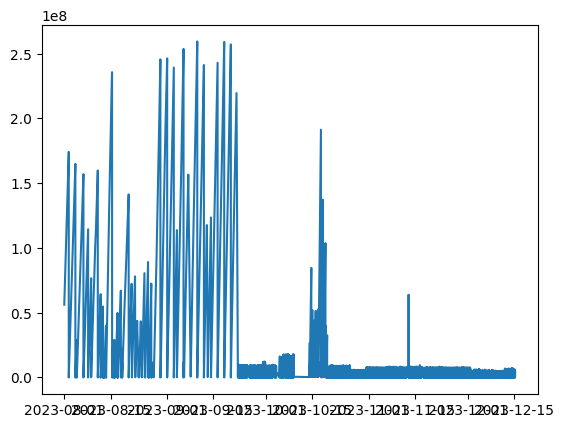

In [22]:
plt.plot(usage.value)
plt.show()

In [23]:
# --------------
# custom formula
# --------------
prevTelemetryValue = 0
prevGraphValue = 0
newGraphValue = 0
arr_value = usage.value.to_list()
# print(x, arr_value)
print('prepare#2.1')
for index in range(len(usage)):
    row = usage.iloc[index]
    # print(row)
    value = float(row.value)
    if index > 0:
        prevTelemetryValue = float(arr_value[index - 1])
        newTelemetryValue = value
        # kondisi 1
        if (prevGraphValue <= prevTelemetryValue):
            if (newTelemetryValue > prevTelemetryValue):
                newGraphValue = newTelemetryValue - prevTelemetryValue + prevGraphValue
            else:
                newGraphValue = prevGraphValue + newTelemetryValue
        else:
            if(newTelemetryValue < prevTelemetryValue):
                # b < a
                newGraphValue = prevGraphValue + newTelemetryValue
            else:
                # b >= a
                newGraphValue = newTelemetryValue - prevTelemetryValue + prevGraphValue
        prevGraphValue = newGraphValue
    else:
        newGraphValue = 0
        prevTelemetryValue = 0
        prevGraphValue = 0
    value = newGraphValue
    usage.at[row.timestamp, 'value'] = value
# print(usage["value"])
usage["value_back"] = usage['value']
usage["value"] = usage["value"].diff()

prepare#2.1


In [80]:
df_forecast=usage['value'].resample('d').sum()

In [81]:
df_forecast

timestamp
2023-08-01    86850138.0
2023-08-02    84399879.0
2023-08-03    82234878.0
2023-08-04    80945442.0
2023-08-05    77458627.0
                 ...    
2023-12-11    59218370.0
2023-12-12    73090960.0
2023-12-13    74278499.0
2023-12-14    76372402.0
2023-12-15    19402825.0
Freq: D, Name: value, Length: 137, dtype: float64

In [82]:
def check_stationarity(df_values):
    result = adfuller(df_values)
    print('Uji stasioneritas untuk kolom value:')
    print('ADF Statistic:', result[0])
    print('P-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}: {value}')

    # Interpretasi hasil uj
    if result[1] <= 0.05:
        print('ok')
        return True, result
    else:
        print('nope')
    return False, result

In [83]:
result = check_stationarity(df_forecast)
df_forecast = df_forecast
if not result[0]:
    # jika belum stationer, dibuat stationer dulu dengan differencing.!
    df_diff = df_forecast.value.diff().dropna()
    result = check_stationarity(df_diff)
    print(df_diff)
    # df_forecast = df_diff
    plt.plot(df_diff)
    plt.show()
print(result[0])

Uji stasioneritas untuk kolom value:
ADF Statistic: -6.1213450780939125
P-value: 8.840016547688417e-08
Critical Values:
 1%: -3.480500383888377
 5%: -2.8835279559405045
 10%: -2.578495716547007
ok
True


In [130]:
n_period = 15
start_date_str_test = '2023-08-01'
end_date_str_test = '2023-11-30'

start_date_str_sum = '2023-11-01'
end_date_str_sum = '2023-11-15'

start_date_str_range_sum = '2023-11-01'
end_date_str_range_sum = '2023-11-30'

start_date_str_graph = '2023-08-01'
end_date_str_graph = '2023-11-15'
train = df_forecast.loc[pd.to_datetime('2023-08-01'):pd.to_datetime('2023-11-15')]
print(train)
print(len(train))

timestamp
2023-08-01     86850138.0
2023-08-02     84399879.0
2023-08-03     82234878.0
2023-08-04     80945442.0
2023-08-05     77458627.0
                 ...     
2023-11-11     90826872.0
2023-11-12     49103521.0
2023-11-13    150008050.0
2023-11-14     95821132.0
2023-11-15     96770819.0
Freq: D, Name: value, Length: 107, dtype: float64
107


In [96]:
model = pm.auto_arima(train, m=1, d=1, seasonal=True, start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore', suppress_warnings=True, stepwise=True, trace=True)
model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4006.319, Time=0.07 sec


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4007.910, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4007.880, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4004.324, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3994.571, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3994.876, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3994.298, Time=0.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4000.788, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3995.825, Time=1.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3997.506, Time=0.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3997.762, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3998.526, Time=3.77 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3991.877, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3999.129, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3992.696, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3989.314, Time=1.66 sec
 ARIMA(2,1

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [97]:
forecast_fix = model.predict(n_periods=n_period, return_conf_int=True)
forecast_fix

(2023-11-16    9.421287e+07
 2023-11-17    9.264386e+07
 2023-11-18    9.201631e+07
 2023-11-19    9.209905e+07
 2023-11-20    9.259826e+07
 2023-11-21    9.324489e+07
 2023-11-22    9.384281e+07
 2023-11-23    9.428257e+07
 2023-11-24    9.453122e+07
 2023-11-25    9.460966e+07
 2023-11-26    9.456719e+07
 2023-11-27    9.445993e+07
 2023-11-28    9.433608e+07
 2023-11-29    9.422869e+07
 2023-11-30    9.415442e+07
 Freq: D, dtype: float64,
 array([[ 2.17059615e+07,  1.66719774e+08],
        [ 3.36792334e+06,  1.81919796e+08],
        [-2.23742358e+06,  1.86270044e+08],
        [-2.93820263e+06,  1.87136308e+08],
        [-2.43959378e+06,  1.87636117e+08],
        [-1.93330889e+06,  1.88423089e+08],
        [-1.50091301e+06,  1.89186527e+08],
        [-1.10456283e+06,  1.89669700e+08],
        [-8.63724699e+05,  1.89926171e+08],
        [-9.30829347e+05,  1.90150146e+08],
        [-1.34384289e+06,  1.90478224e+08],
        [-2.00767812e+06,  1.90927534e+08],
        [-2.76912220e+06, 

In [98]:
forecast_range = pd.date_range(start=start_date_str_test, periods=n_period, freq='d')
forecast_range

DatetimeIndex(['2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19',
               '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23',
               '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30'],
              dtype='datetime64[ns]', freq='D')

In [99]:
forecast_fix_df = pd.DataFrame(forecast_fix[0], index=forecast_range,columns=['Prediction'])
forecast_fix_df

,Prediction
2023-11-16,9.421287e+07
2023-11-17,9.264386e+07
2023-11-18,9.201631e+07
2023-11-19,9.209905e+07
2023-11-20,9.259826e+07
2023-11-21,9.324489e+07
2023-11-22,9.384281e+07
2023-11-23,9.428257e+07
2023-11-24,9.453122e+07
2023-11-25,9.460966e+07


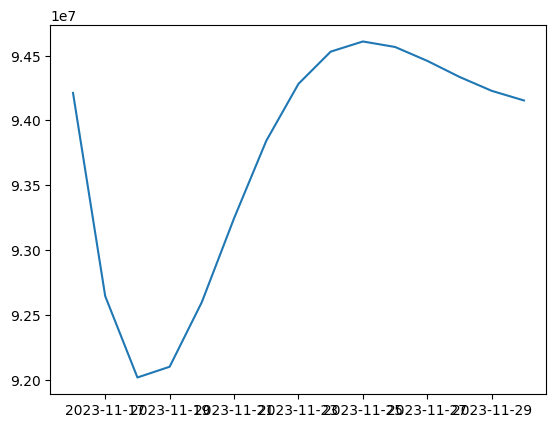

In [100]:
plt.plot(forecast_fix_df)
plt.show()

In [101]:
df_range_sum = df_forecast.loc[start_date_str_sum:end_date_str_sum]
df_range_sum

timestamp
2023-11-01     90004459.0
2023-11-02     89754710.0
2023-11-03     89599160.0
2023-11-04     89253139.0
2023-11-05     89405074.0
2023-11-06     93393576.0
2023-11-07     96849805.0
2023-11-08     96704900.0
2023-11-09     90976177.0
2023-11-10     93543146.0
2023-11-11     90826872.0
2023-11-12     49103521.0
2023-11-13    150008050.0
2023-11-14     95821132.0
2023-11-15     96770819.0
Freq: D, Name: value, dtype: float64

In [102]:
df_merge = pd.concat([df_range_sum, forecast_fix_df], axis=1)
df_merge

,value,Prediction
2023-11-01,90004459.0,NaN
2023-11-02,89754710.0,NaN
2023-11-03,89599160.0,NaN
2023-11-04,89253139.0,NaN
2023-11-05,89405074.0,NaN
2023-11-06,93393576.0,NaN
2023-11-07,96849805.0,NaN
2023-11-08,96704900.0,NaN
2023-11-09,90976177.0,NaN
2023-11-10,93543146.0,NaN


<Axes: >

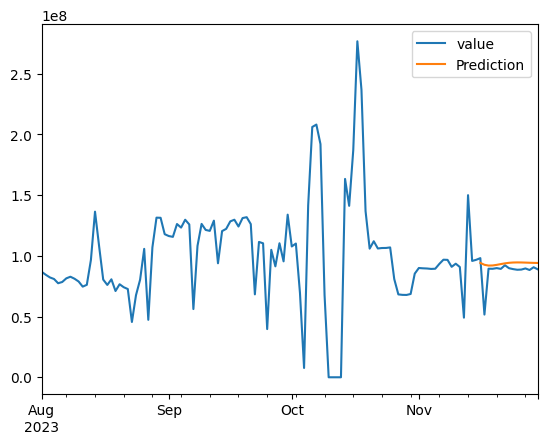

In [114]:
pd.concat([df_forecast.loc[start_date_str_test:end_date_str_test], forecast_fix_df], axis=1).plot()


In [103]:
df_merge = df_merge['value'].fillna(df_merge['Prediction'])
df_merge

2023-11-01    9.000446e+07
2023-11-02    8.975471e+07
2023-11-03    8.959916e+07
2023-11-04    8.925314e+07
2023-11-05    8.940507e+07
2023-11-06    9.339358e+07
2023-11-07    9.684980e+07
2023-11-08    9.670490e+07
2023-11-09    9.097618e+07
2023-11-10    9.354315e+07
2023-11-11    9.082687e+07
2023-11-12    4.910352e+07
2023-11-13    1.500080e+08
2023-11-14    9.582113e+07
2023-11-15    9.677082e+07
2023-11-16    9.421287e+07
2023-11-17    9.264386e+07
2023-11-18    9.201631e+07
2023-11-19    9.209905e+07
2023-11-20    9.259826e+07
2023-11-21    9.324489e+07
2023-11-22    9.384281e+07
2023-11-23    9.428257e+07
2023-11-24    9.453122e+07
2023-11-25    9.460966e+07
2023-11-26    9.456719e+07
2023-11-27    9.445993e+07
2023-11-28    9.433608e+07
2023-11-29    9.422869e+07
2023-11-30    9.415442e+07
Freq: D, Name: value, dtype: float64

In [127]:
value_sum_actual = df_forecast.loc[start_date_str_range_sum:end_date_str_range_sum].sum()
value_sum_predict = df_merge.sum()
mae = abs(value_sum_predict - value_sum_actual)
mape = ((mae / value_sum_actual) * 100)
print('Actual:',value_sum_actual)
print('Predict:',value_sum_predict)
print('Percentage:',(value_sum_predict / value_sum_actual) * 100)
print('MAE', mae.mean())
print('MAPE', mape.mean())

Actual: 2715873832.0
Predict: 2807842350.085561
Percentage: 103.3863324946076
MAE 91968518.0855608
MAPE 3.3863324946076063


In [129]:
df_forecast.resample('ME').sum()

timestamp
2023-08-31    2.672744e+09
2023-09-30    3.372942e+09
2023-10-31    3.335615e+09
2023-11-30    2.715874e+09
2023-12-31    9.481140e+08
Freq: ME, Name: value, dtype: float64